In [2]:
# 导入包
import torch
import numpy as np

# 1、数据类型
    int                     IntTensor
    float                   FloatTensor
    int array               IntTensor[d1,d2,...]
    float array             FloatTensor[d1,d2,...]
    string                  使用编码的方式表示string类型

# from_numpy()
使用 from_numpy() 将 numpy 数据转化为 tensor    
默认为torch.float64类型 torch.DoubleTensor

In [3]:
# import from numpy
a = np.array([2,3.4])
a = torch.from_numpy(a)
print(a)
b = np.ones([2,3])
b = torch.from_numpy(b)
print(b)

tensor([2.0000, 3.4000], dtype=torch.float64)
tensor([[1., 1., 1.],
        [1., 1., 1.]], dtype=torch.float64)


In [4]:
# import from list
a = torch.tensor([2., 3.2])
print(a, a.type())
b = torch.tensor([[2,3.2], [1,2.2]])
print(b, b.type())

tensor([2.0000, 3.2000]) torch.FloatTensor
tensor([[2.0000, 3.2000],
        [1.0000, 2.2000]]) torch.FloatTensor


# empty, Tensor, IntTensor, FloatTensor的应用
torch.Tensor()是python类-----------torch.FloatTensor    
torch.tensor()是python函数  
Tensor()接收维度， tensor()接收数据     
效果差不多，用法有一定的区别

In [5]:
# 初始化数据的函数
a = torch.empty(1,4)
print(a, a.type()) 
b = torch.Tensor(2,3)   # 随机
print(b, b.type())
c = torch.tensor((1,2,3))
print(c, c.type())

tensor([[8.4490e-39, 1.0194e-38, 8.9082e-39, 8.4490e-39]]) torch.FloatTensor
tensor([[9.3674e-39, 1.0929e-38, 1.0469e-38],
        [8.4490e-39, 1.1112e-38, 9.5511e-39]]) torch.FloatTensor
tensor([1, 2, 3]) torch.LongTensor


# 改变默认数据类型 
PyTorch的默认类型是FloatTensor  
使用set_default_tensor_type()改变默认数据类型

In [6]:
print(torch.tensor([1.2, 3]).type())
torch.set_default_tensor_type(torch.DoubleTensor)
print(torch.tensor([1.2, 3]).type())

torch.FloatTensor
torch.DoubleTensor


# 切片

In [7]:
a = torch.rand(4,5,6)
print(a.shape)
b = a[0:3:2,:,:]
print(b.shape)
print(a[a>0.5])

torch.Size([4, 5, 6])
torch.Size([2, 5, 6])
tensor([0.7179, 0.7893, 0.5474, 0.6799, 0.7482, 0.7231, 0.5528, 0.6830, 0.7312,
        0.9746, 0.8010, 0.5123, 0.7358, 0.6829, 0.6521, 0.9753, 0.9356, 0.9375,
        0.9403, 0.7518, 0.6224, 0.5517, 0.7748, 0.7679, 0.6387, 0.6818, 0.5453,
        0.7594, 0.8017, 0.5390, 0.8013, 0.6187, 0.5144, 0.7044, 0.7314, 0.8759,
        0.7842, 0.6881, 0.8244, 0.6899, 0.9117, 0.6755, 0.7291, 0.7848, 0.8143,
        0.5004, 0.8892, 0.8549, 0.6589, 0.8626, 0.9132, 0.6851, 0.6785, 0.9860,
        0.5624, 0.7200, 0.7185, 0.8171, 0.9923, 0.9549, 0.9051, 0.5911, 0.9679,
        0.5334])


# 维度变换

In [8]:
# 使用view变换维度
a = torch.rand(4,3,2)
print(a)

b = a.view(4, 3*2)
print(b)

tensor([[[0.9287, 0.9168],
         [0.1065, 0.7998],
         [0.9451, 0.0527]],

        [[0.1955, 0.6370],
         [0.7330, 0.3460],
         [0.7503, 0.0587]],

        [[0.2362, 0.0986],
         [0.0872, 0.6687],
         [0.4625, 0.8354]],

        [[0.0654, 0.6410],
         [0.9370, 0.1740],
         [0.0156, 0.1133]]])
tensor([[0.9287, 0.9168, 0.1065, 0.7998, 0.9451, 0.0527],
        [0.1955, 0.6370, 0.7330, 0.3460, 0.7503, 0.0587],
        [0.2362, 0.0986, 0.0872, 0.6687, 0.4625, 0.8354],
        [0.0654, 0.6410, 0.9370, 0.1740, 0.0156, 0.1133]])


In [9]:
# 使用 unsqueeze 增维
# unsqueeze(x) 再x位置上插入一个维度
print(a.unsqueeze(0).shape)
print(a.unsqueeze(1).shape)
print(a.unsqueeze(-1).shape)
print(a.unsqueeze(-2).shape)

torch.Size([1, 4, 3, 2])
torch.Size([4, 1, 3, 2])
torch.Size([4, 3, 2, 1])
torch.Size([4, 3, 1, 2])


In [10]:
# 使用 unsqueeze 降维(不包含参数的维度)
a = torch.rand(4,3,1,1)
print(a.squeeze(0).shape)
print(a.squeeze(1).shape)
print(a.squeeze(2).shape)
print(a.squeeze(3).shape)
print(a.squeeze(2).squeeze(2).shape)


torch.Size([4, 3, 1, 1])
torch.Size([4, 3, 1, 1])
torch.Size([4, 3, 1])
torch.Size([4, 3, 1])
torch.Size([4, 3])


In [11]:
# 使用 expand 扩展维度(扩张维度为1的位置)
a = torch.rand(4,2,1)
print(a)
print(a.expand(4,2,2))

tensor([[[0.5900],
         [0.7323]],

        [[0.7051],
         [0.2751]],

        [[0.3165],
         [0.9685]],

        [[0.5393],
         [0.9983]]])
tensor([[[0.5900, 0.5900],
         [0.7323, 0.7323]],

        [[0.7051, 0.7051],
         [0.2751, 0.2751]],

        [[0.3165, 0.3165],
         [0.9685, 0.9685]],

        [[0.5393, 0.5393],
         [0.9983, 0.9983]]])


In [12]:
# 使用 repeat 扩展维度
a = torch.rand(2,2)
print(a)
print(a.repeat(2,2))
print(a.repeat(2*2,2))

tensor([[0.8370, 0.6487],
        [0.3538, 0.6472]])
tensor([[0.8370, 0.6487, 0.8370, 0.6487],
        [0.3538, 0.6472, 0.3538, 0.6472],
        [0.8370, 0.6487, 0.8370, 0.6487],
        [0.3538, 0.6472, 0.3538, 0.6472]])
tensor([[0.8370, 0.6487, 0.8370, 0.6487],
        [0.3538, 0.6472, 0.3538, 0.6472],
        [0.8370, 0.6487, 0.8370, 0.6487],
        [0.3538, 0.6472, 0.3538, 0.6472],
        [0.8370, 0.6487, 0.8370, 0.6487],
        [0.3538, 0.6472, 0.3538, 0.6472],
        [0.8370, 0.6487, 0.8370, 0.6487],
        [0.3538, 0.6472, 0.3538, 0.6472]])


# 拼接与拆分 --- Cat, Stack, Split, Chunk

In [13]:
a = torch.rand(2,2)
b = torch.rand(2,2)
print(a, b)
print(torch.cat([a, b], dim=1).shape)
print(torch.cat([a, b], dim=0).shape)
print(torch.stack([a, b], dim=0).shape)
print(torch.stack([a, b], dim=1).shape)
print(a.split(1, dim=1))
print(a.chunk(2, dim=0))    # 等量分割

tensor([[0.7982, 0.5251],
        [0.6214, 0.0242]]) tensor([[0.0729, 0.7673],
        [0.0245, 0.8730]])
torch.Size([2, 4])
torch.Size([4, 2])
torch.Size([2, 2, 2])
torch.Size([2, 2, 2])
(tensor([[0.7982],
        [0.6214]]), tensor([[0.5251],
        [0.0242]]))
(tensor([[0.7982, 0.5251]]), tensor([[0.6214, 0.0242]]))


# PyTorch 的基本数学运算
## 数学运算
Add/minus/multiply/divide   
Matmul  
Pow     
Sqrt/rsqrt  
Round


In [14]:
# add 加
a = torch.rand(3,4)
b = torch.rand(4)
print(a, "\n", b)
print(a+b)
print(torch.add(a,b))

tensor([[0.1932, 0.0082, 0.3093, 0.0657],
        [0.0753, 0.0833, 0.1849, 0.3216],
        [0.1672, 0.2167, 0.3714, 0.6963]]) 
 tensor([0.5981, 0.9489, 0.4039, 0.4655])
tensor([[0.7913, 0.9571, 0.7132, 0.5312],
        [0.6734, 1.0321, 0.5888, 0.7871],
        [0.7653, 1.1655, 0.7753, 1.1619]])
tensor([[0.7913, 0.9571, 0.7132, 0.5312],
        [0.6734, 1.0321, 0.5888, 0.7871],
        [0.7653, 1.1655, 0.7753, 1.1619]])


In [15]:
# sub 减；mul 乘；div 除
print(torch.sub(a,b))
print(torch.mul(a,b))
print(torch.div(a,b))


tensor([[-0.4049, -0.9406, -0.0946, -0.3999],
        [-0.5228, -0.8656, -0.2191, -0.1440],
        [-0.4309, -0.7322, -0.0325,  0.2308]])
tensor([[0.1156, 0.0078, 0.1249, 0.0306],
        [0.0451, 0.0790, 0.0747, 0.1497],
        [0.1000, 0.2056, 0.1500, 0.3242]])
tensor([[0.3231, 0.0087, 0.7657, 0.1410],
        [0.1260, 0.0877, 0.4576, 0.6907],
        [0.2795, 0.2283, 0.9195, 1.4958]])


In [16]:
torch.eq(a-b, torch.sub(a,b))
torch.all(torch.eq(a-b, torch.sub(a,b)))

tensor(True)

In [17]:
# 矩阵相乘 matmul --- 另一种写法：@
a = torch.rand(1,4)
b = torch.rand(4,1)
print(torch.matmul(a,b))
print(a@b)


tensor([[1.1722]])
tensor([[1.1722]])


In [18]:
# Power exp log
# sqrt ,rsqrt
a = torch.full([2,3],3)
print(a.pow(2))
print(a**2)

tensor([[9, 9, 9],
        [9, 9, 9]])
tensor([[9, 9, 9],
        [9, 9, 9]])


# 统计性质
norm----范数        
mean_sum    
prod----所有元素的积    
max, min, argmin, argmax    
kthvalue, topk

In [19]:
a = torch.arange(8).view(2,4).type(torch.FloatTensor)
print(a)
print(a.min(), a.max(), a.mean(), a.prod())

tensor([[0., 1., 2., 3.],
        [4., 5., 6., 7.]], dtype=torch.float32)
tensor(0., dtype=torch.float32) tensor(7., dtype=torch.float32) tensor(3.5000, dtype=torch.float32) tensor(0., dtype=torch.float32)


In [20]:
# 类中__call__的使用
class test:
    def __init__(self, a):
        print(a)
        pass
    def __call__(self, b):
        print(b)
        pass
c = test(1111)

c(111111111)

1111
111111111


# where 和 gather操作

In [21]:
# where
# torch.where(condition, x, y)
cond = torch.rand(2,2)
print(cond)
a = torch.ones(2,2)
b = torch.zeros(2,2)
torch.where(cond>0.5, a, b)

tensor([[0.0246, 0.2971],
        [0.2750, 0.8281]])


tensor([[0., 0.],
        [0., 1.]])

In [22]:
# gather搜集
# torch.gather(input, dim, index, out=None)
a = torch.arange(10)+100
print(a)
torch.gather(a.expand(4,10), dim=1, index=torch.tensor([[1,1,2],[1,2,3],[1,4,3],[0,5,3]]))

tensor([100, 101, 102, 103, 104, 105, 106, 107, 108, 109])


tensor([[101, 101, 102],
        [101, 102, 103],
        [101, 104, 103],
        [100, 105, 103]])

# PyTorch 自动求导
1、创建求导变量，在创建张量时 requires_grad=True    
2、使用 backward() 求出导数（梯度）或者使用 autograd.grad() 求出导数（梯度）

In [45]:
from torch.nn import functional as F
x = torch.ones([1,3])
# x = torch.tensor([1,2])
print(x)
# w = torch.full([1],5., requires_grad=True)
w = torch.full([1,3],5.)
print(w)
w.requires_grad_()
mse = F.mse_loss(torch.ones([1,3]), x*w)
print(mse)

# 使用 autograd.grad() 求导
# 使用 retain_graph 可保留图（每次求导，图被清除，必须再次建立，使用retain_graph可保留图到下次求导）
a = torch.autograd.grad(mse, [w], retain_graph=True)
print(a)

# 使用 backward() 求导
mse.backward()
print(w.grad)


tensor([[1., 1., 1.]])
tensor([[5., 5., 5.]])
tensor(16., grad_fn=<MseLossBackward0>)
(tensor([[2.6667, 2.6667, 2.6667]]),)
tensor([[2.6667, 2.6667, 2.6667]])


In [24]:
a=torch.tensor([-1,2,3])
b=torch.tensor([3,2,3])
a[1] = 11
print(a)
torch.where((a>1)&(b<3))

torch.abs(a)

tensor([-1, 11,  3])


tensor([ 1, 11,  3])

In [68]:
a = torch.rand(2,2)
a[:]=2
print(a)
# print(torch.pow(a,2))
# (a.T).repeat(2,2)

tensor([[2., 2.],
        [2., 2.]])


In [52]:
torch.full([1], 0.5)

tensor([0.5000])

In [61]:
torch.zeros(10)

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [73]:
def test1(a=2):
    print(type(a))

test1()

<class 'int'>


In [80]:
a = list([])
a.append(1)
a.append(2)
print(a)

[1, 2]


# 通过反向传播法优化问题

In [16]:
import  numpy as np
from    matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import  torch


## Himmelblau function
himmelblau函数是数学家们构造出来的一个特殊的函数，可以用来测试深度学习算法是否能够收敛到局部最小值。这个函数的表达式是：    
$f(x,y)=(x^2+y-11)^2+(x+y^2-7)^2$

In [17]:
def himmelblau(x):
    return (x[0] ** 2 + x[1] - 11) ** 2 + (x[0] + x[1] ** 2 - 7) ** 2

In [55]:
x = np.arange(-6,6,0.1)
y = np.arange(-6,6,0.1)
print('x,y range:', x.shape, y.shape)

x,y range: (120,) (120,)


In [56]:
X, Y = np.meshgrid(x, y)
print('X,Y maps:', X.shape, Y.shape)

X,Y maps: (120, 120) (120, 120)


In [57]:
Z = himmelblau([X, Y])
# print(Z)

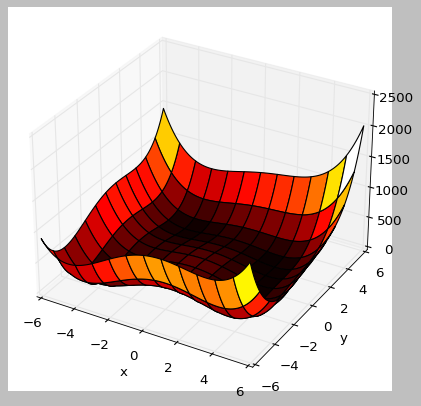

In [62]:
fig = plt.figure('himmelblau')
# ax = fig.gca(projection='3d')
ax = fig.add_subplot(projection = '3d')
fig1 = ax.plot_surface(X, Y, Z, cmap='hot')
# plt.colorbar(fig1)
# ax.view_init(0, 0)
ax.set_xlabel('x')
ax.set_ylabel('y')
plt.show()

In [59]:
# [1., 0.], [-4, 0.], [4, 0.]
x = torch.tensor([1., 0.], requires_grad=True)
# 构造优化器--adam算法来源：Adam: A Method for Stochastic Optimization(Adaptive Moment Estimation)
optimizer = torch.optim.Adam([x], lr=1e-3)
for step in range(20000):

    # 要找到himmelblau的最小值，损失函数就是himmelblau的函数值
    pred = himmelblau(x)

    optimizer.zero_grad()
    pred.backward()
    optimizer.step()

    # 使用item得到张量中得元素值
    if step % 2000 == 0:
        print ('step {}: x = {}, f(x) = {}'
               .format(step, x.tolist(), pred.item()))

step 0: x = [1.0010000467300415, 0.0009999999310821295], f(x) = 136.0
step 2000: x = [2.744952917098999, 1.858483076095581], f(x) = 3.236123561859131
step 4000: x = [2.997783899307251, 2.0032827854156494], f(x) = 0.00022081792121753097
step 6000: x = [2.999986171722412, 2.0000176429748535], f(x) = 7.425342118949629e-09
step 8000: x = [2.999994993209839, 2.0000061988830566], f(x) = 9.24956111703068e-10
step 10000: x = [2.9999983310699463, 2.000002145767212], f(x) = 1.0277290130034089e-10
step 12000: x = [2.9999992847442627, 2.0000007152557373], f(x) = 1.1823431123048067e-11
step 14000: x = [2.999999761581421, 2.000000238418579], f(x) = 1.8189894035458565e-12
step 16000: x = [3.0, 2.0], f(x) = 0.0
step 18000: x = [3.0, 2.0], f(x) = 0.0
